In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np


In [2]:
import tensorflow as tf
import os
dataset_path = "E:/Plant Datset/Dataset/train"
def get_class_names(dataset_path):
    class_names = sorted([dir_name for dir_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, dir_name))])
    return class_names
def load_dataset(dataset_path):
    return tf.keras.preprocessing.image_dataset_from_directory(
        dataset_path,
        image_size=(256, 256),
        batch_size=32
    )
class_names = get_class_names(dataset_path)
dataset = load_dataset(dataset_path)
print("There are a total of : - ", len(class_names), "classes")
for i in class_names:
    print(i)


Found 70295 files belonging to 38 classes.
There are a total of : -  38 classes
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yello

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'E:/Plant Datset/Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


['adfdba4a-a725-4c5b-8b1c-96e8b20baa7b___FREC_Scab 3265_new30degFlipLR.JPG']
Image shape: (256, 256, 3)


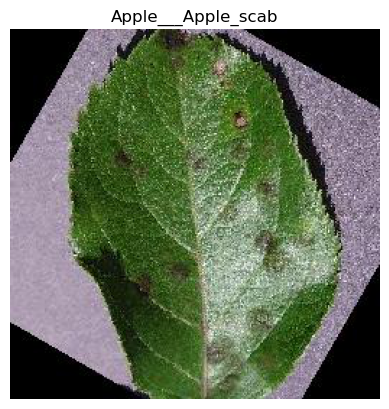

In [5]:

img = view_random_image(target_dir="C:/Users/Himanshu/Downloads/Compressed/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/",
                        target_class="Apple___Apple_scab")

In [6]:
print(img)
print(img.shape)
print(img/255.)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(256, 256, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'E:/Plant Datset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
def predict_class(filename, model):
    img = load_img(filename, target_size=(128,128))
    plt.imshow(img)
    img =img_to_array(img)
    img = img.reshape(1,128,128,3)
    img = img.astype('float32')
    img = img/255.0
    result = model.predict(img)
    dict2 = {}
    for i in range(32):
        dict2[result[0][i]] = class_names[i]
    res = result[0]
    res.sort()
    res[::-1]
    results = res[::3]
    print("Top 3 predictions of the model are:-")
    for i in range(3):
        print("{}:{}".format(dict2[results[i]],
                             (results[i]*100).round(2)))

In [9]:
model = Sequential([
    Conv2D(filters = 32,
    kernel_size= (3,3),
    strides= (1,1),
    padding = 'valid',
    activation = 'relu',
    input_shape=[128,128,3]),
    Conv2D(filters= 32,kernel_size=(3,3),activation= 'relu'),
    MaxPool2D(pool_size = 2 , strides = 2),
    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    Conv2D(filters=128,
           kernel_size=(3,3),
           padding='same',
           activation='relu'),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'),
    Conv2D(filters=512,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(1500, activation= 'relu'),
    Dropout(0.4),
    Dense(38, activation='softmax')])
#opt = tf.keras.optimizers.SGD(lr= 0.001, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy',
optimizer= Adam(),
metrics= ['accuracy'])
model.summary()

c:\Users\Himanshu\Desktop\Sample_Project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'base1.png',show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:
history = model.fit(x= training_set, validation_data= validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5043s 2s/step - accuracy: 0.0345 - loss: 3.6323 - val_accuracy: 0.3638 - val_loss: 2.1610
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4720s 2s/step - accuracy: 0.4143 - loss: 1.9472 - val_accuracy: 0.6490 - val_loss: 1.1232
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4828s 2s/step - accuracy: 0.6231 - loss: 1.2087 - val_accuracy: 0.7261 - val_loss: 0.8844
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5109s 2s/step - accuracy: 0.6964 - loss: 0.9559 - val_accuracy: 0.7347 - val_loss: 0.8355
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5611s 3s/step - accuracy: 0.7391 - loss: 0.8134 - val_accuracy: 0.7952 - val_loss: 0.6458
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5506s 3s/step - accuracy: 0.7697 - loss: 0.7197 - val_accuracy: 0.8035 - val_loss: 0.6061
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5333s 2s/step - accuracy: 0.7845 - loss: 0.6685 - val_accuracy: 0.8213 - val_loss: 0.5577
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5341s 2s/step - accuracy: 0.8039 -

In [12]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1644s 748ms/step - accuracy: 0.8781 - loss: 0.3739
Training accuracy: 0.8858097791671753


In [13]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1477s 672ms/step - accuracy: 0.8784 - loss: 0.3733
Training accuracy: 0.8858097791671753


In [14]:
model.save('trained_plant_disease_model.keras')

In [15]:
history.history

{'accuracy': [0.07413045316934586,
  0.4856959879398346,
  0.6449249386787415,
  0.7094530463218689,
  0.7476491928100586,
  0.7725727558135986,
  0.7872679233551025,
  0.8049647808074951,
  0.8110249638557434,
  0.8163880705833435],
 'loss': [3.4262800216674805,
  1.687323808670044,
  1.1287622451782227,
  0.9127549529075623,
  0.7857911586761475,
  0.7047126293182373,
  0.6582523584365845,
  0.6031067967414856,
  0.5841532945632935,
  0.568733811378479],
 'val_accuracy': [0.3637605309486389,
  0.6489869952201843,
  0.726098358631134,
  0.7346915602684021,
  0.7951855063438416,
  0.8034942150115967,
  0.8213066458702087,
  0.828363299369812,
  0.8405417799949646,
  0.8413385152816772],
 'val_loss': [2.161038875579834,
  1.123231291770935,
  0.8844021558761597,
  0.8355218768119812,
  0.6457844376564026,
  0.606062114238739,
  0.557684600353241,
  0.5290526151657104,
  0.49518653750419617,
  0.4827284812927246]}

In [16]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [17]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label = "training loss")
    plt.plot(epochs, val_loss , label = "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs,accuracy, label = "training accuracy ")
    plt.plot(epochs,val_accuracy, label = "val_accuracy ")
    plt.title("accuracy")
    plt.xlabel("epcohs")
    plt.legend()

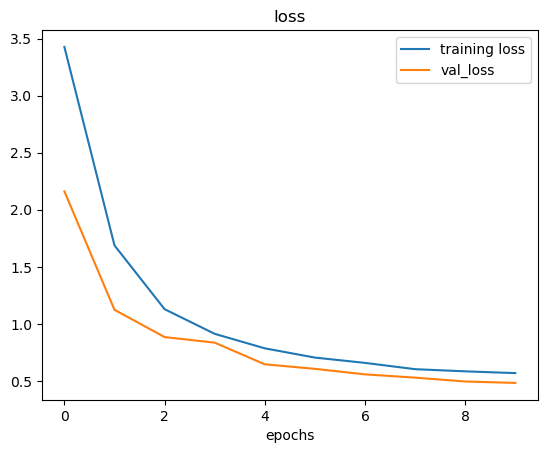

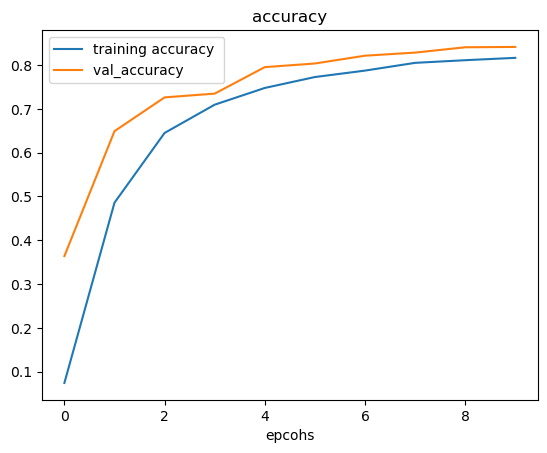

In [18]:
plot_loss_curves(history)

In [19]:
class_name = validation_set.class_names

In [20]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'E:/Plant Datset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [21]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 767s 44ms/step


In [22]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [23]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [24]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [25]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [27]:
cm

array([[347,  19,  10, ...,   0,   0,   0],
       [  2, 469,   0, ...,   0,   0,   0],
       [  5,   2, 400, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 460,   1,   1],
       [  0,   0,   0, ...,   5, 396,   0],
       [  2,   0,   3, ...,   1,   0, 410]], dtype=int64)

In [28]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.73      0.69      0.71       504
                                 Apple___Black_rot       0.86      0.94      0.90       497
                          Apple___Cedar_apple_rust       0.80      0.91      0.85       440
                                   Apple___healthy       0.86      0.79      0.83       502
                               Blueberry___healthy       0.86      0.90      0.88       454
          Cherry_(including_sour)___Powdery_mildew       0.90      0.91      0.91       421
                 Cherry_(including_sour)___healthy       0.89      0.96      0.92       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.78      0.82       410
                       Corn_(maize)___Common_rust_       0.97      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.78      0.87      0.

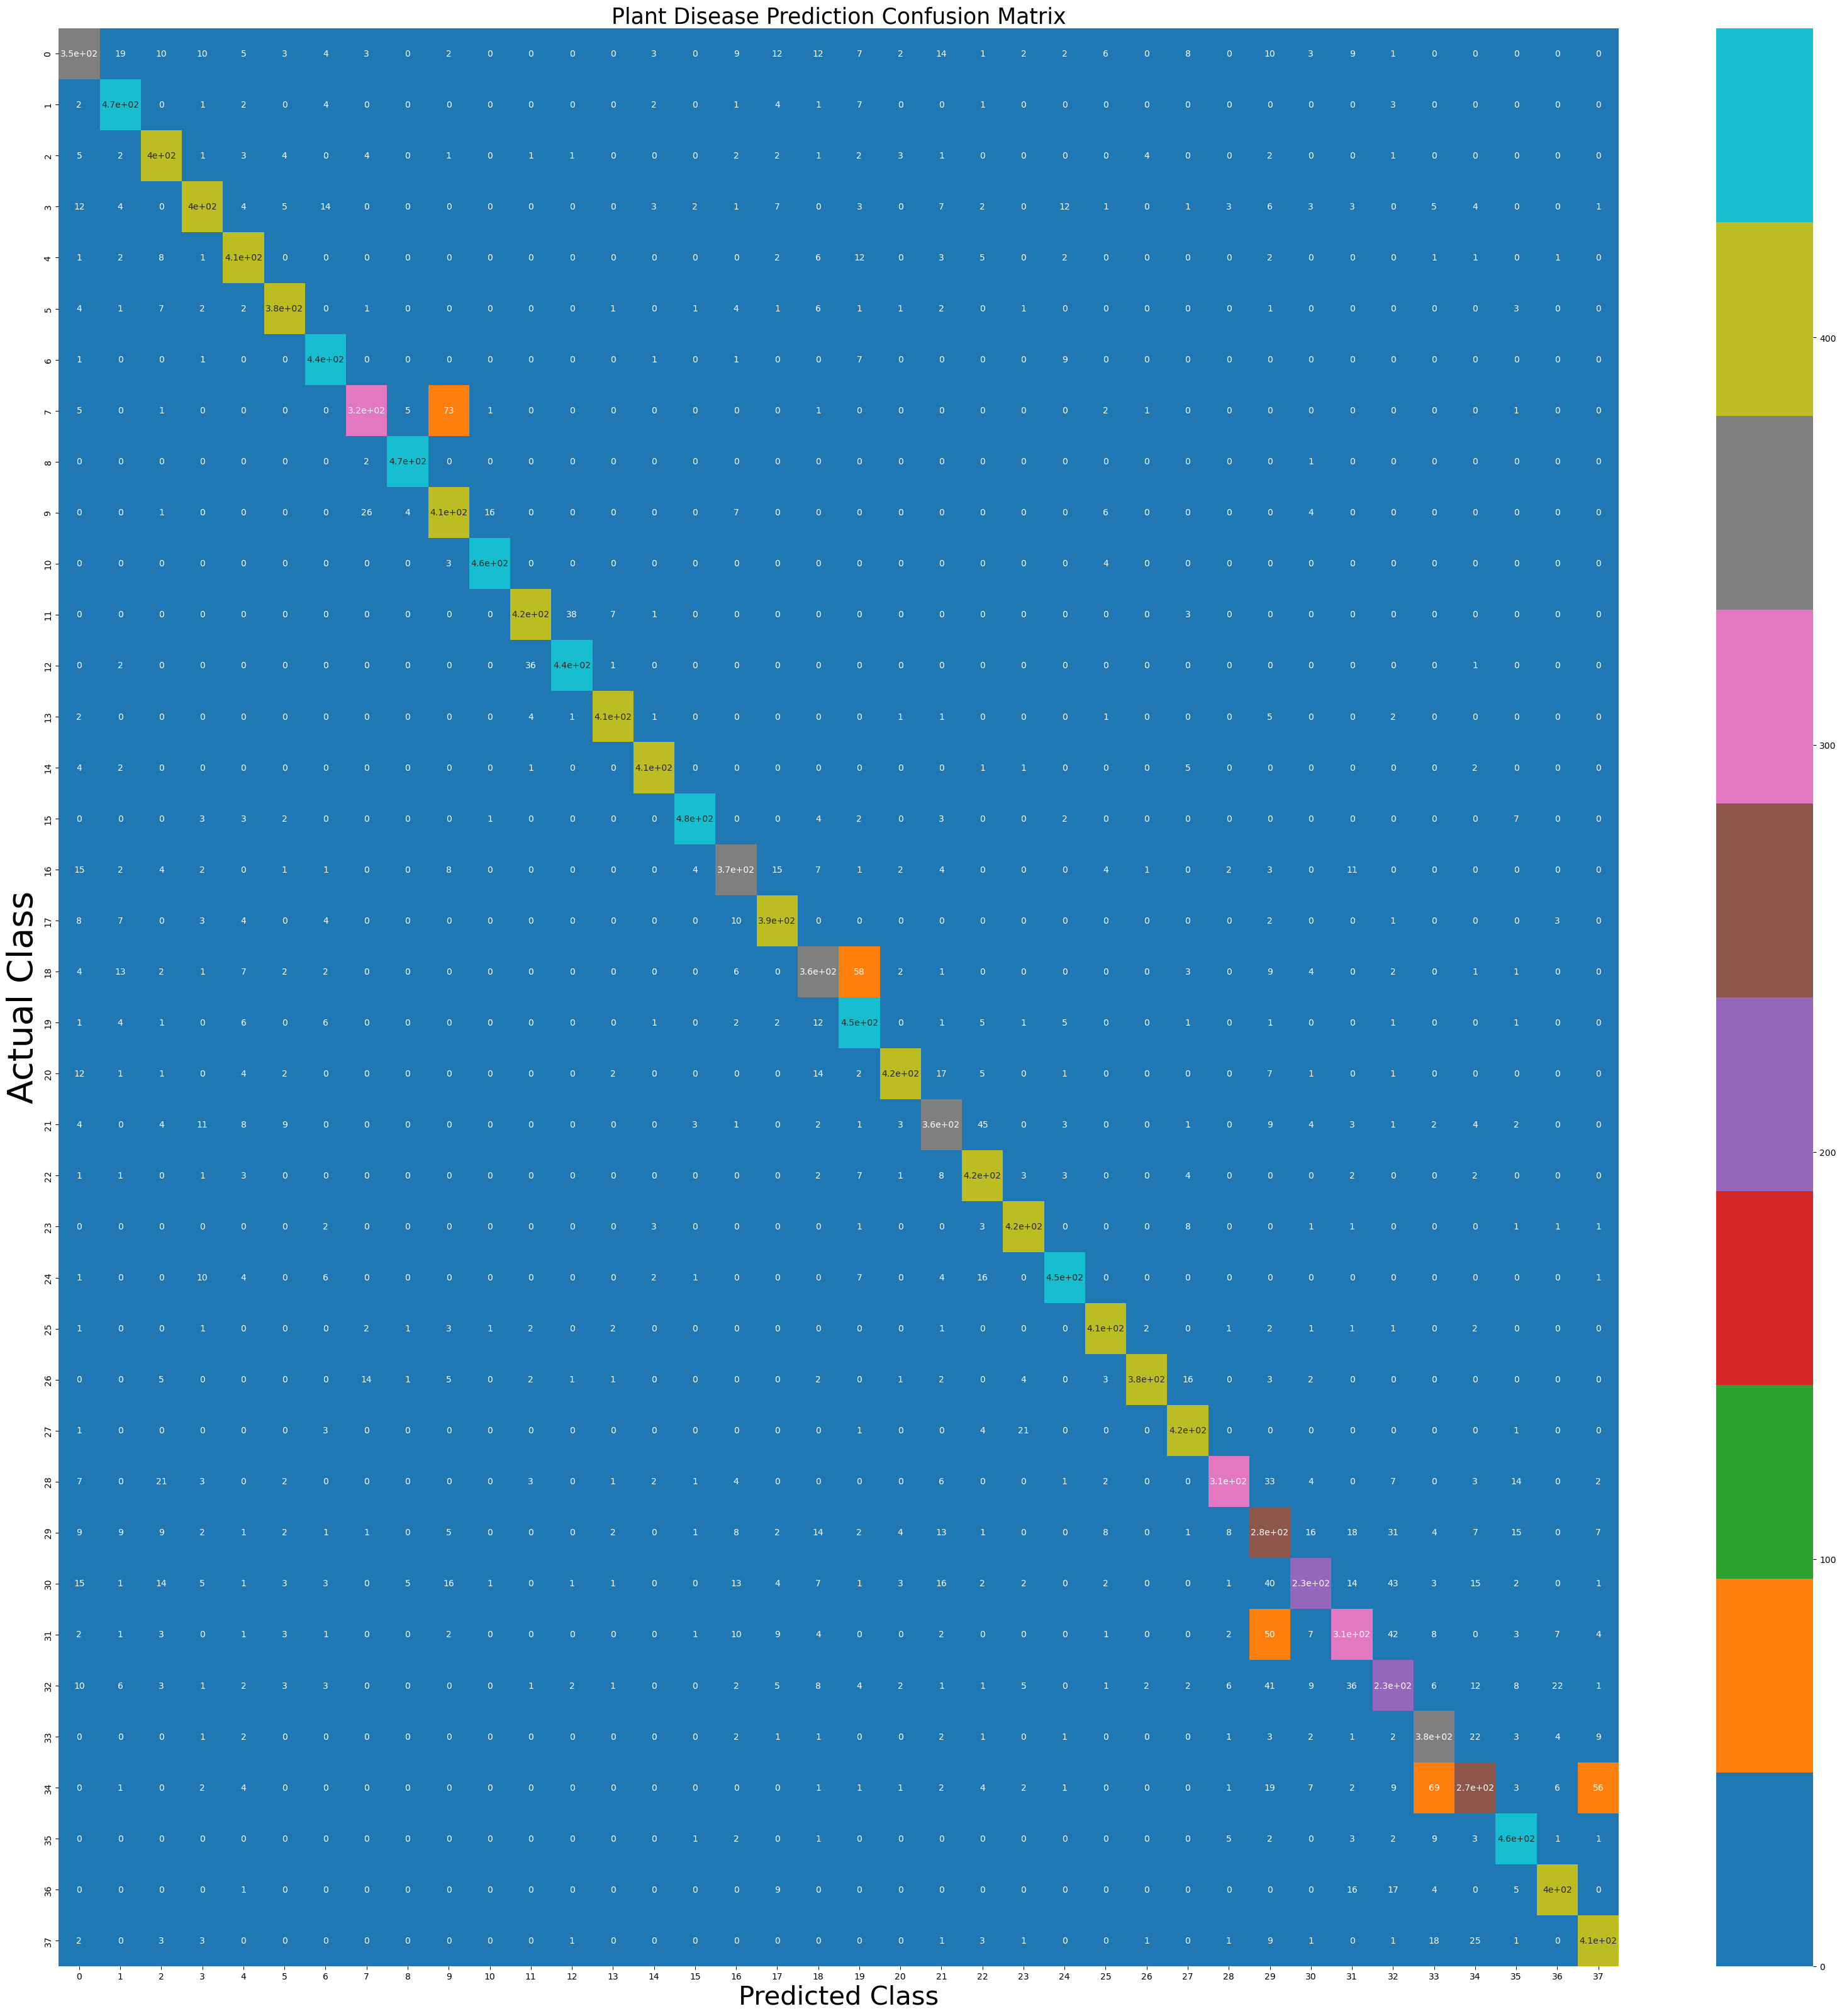

In [29]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='tab10')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()